# **The Effects of Automobile Dependency in the United States**
## Contributors: Nicholas Breymaier and Zachary Osborne

# Introduction
A place, ranging from a neighborhood-scale to nation-scale geographic area, is referred to as <a href='https://www.planetizen.com/definition/automobile-dependency'>automobile dependent</a>, or car dependent, when the only means by which residents are realistically capable of reaching necessities is by driving a personal automobile. By necessities we mean any locations necessary to live a successful life in modern society, such as institutions of education, jobs, and grocery stores. For the purposes of this analysis, the term 'car' or 'automobile' includes standard sedans and station wagons as well as vans and <a href='https://www.ecfr.gov/current/title-40/chapter-I/subchapter-C/part-86/subpart-A/section-86.082-2'>light-duty trucks</a> such as Sport Utility Vehicles (SUVs) and pickup trucks.

This project serves as an analysis of some of the conseqeuences of and alternatives to car dependency in the United States over time for the purpose of raising awareness, but is by no means meant to be a comprehensive review of the subject. For readers who are interested in learning more about the causes of car dependency and how to fix it, we strongly encourage that you do more research on the subject; the "Further Information for Interested Readers" section at the bottom of this webpage may serve as a good place to start.

We will focus primarily on automobile dependency in the United States. We have chosen to work with data from recent years as opposed to longitudinal data in order to discuss recent trends which are more pertinent to living today than long-term trends which are more useful to historical analysis.

## The Importance of Automobile Dependency in the United States
Over <a href='https://www.forbes.com/advisor/car-insurance/car-ownership-statistics'>90%</a> of households in the United States (US) owned at least one car in 2021, with more than <a href='https://www.forbes.com/advisor/car-insurance/car-ownership-statistics/'>59%</a> owning two or more cars owing to the commonness of married couples having seperate jobs. In 2015, over <a href='https://www.bts.gov/content/commute-mode-share-2015'>80%</a> of commutes were taken by car, as were <a href="https://www.epa.gov/greenvehicles/what-if-more-people-bought-groceries-online-instead-driving-store">88%</a> of grocery store trips. As of 2019, over <a href='https://www.bloomberg.com/news/articles/2019-05-07/how-distance-to-school-affects-student-well-being#:~:text=Today%2C%20nearly%2060%20percent%20of,especially%20on%20sleep%20and%20exercise.'>60%</a> of students in primary and secondary education are driven to school. These trends arise because the vast majority of Americans simply have no other choice but to reach their destinations by driving, whether this be due to distance<a href='https://www.nrc.gov/docs/ML1006/ML100621425.pdf'>—the average commute is 15 miles—</a>or to lack of safety, which we address in our analysis. In both of these cases, there is a complete lack of safe, convenient, long distance alternatives such as <a href='https://www.apta.com/news-publications/public-transportation-facts/'>public transportation</a>. In other words, the United States <a href='https://www.vox.com/22662963/end-driving-obsession-connectivity-zoning-parking'>is car dependent</a>.

This is problematic for <a href ='https://www.strongtowns.org/journal/2015/1/20/the-negative-consequences-of-car-dependency#:~:text=Living%20in%20a%20car%20dependent,)%20and%20indirect%20(taxes.)'>many reasons</a>, the most dire of which are environmental, financial, and mortal—that is, deadly. We are in the middle of the <a href='https://www.who.int/health-topics/climate-change#tab=tab_1'>climate crisis</a> scientists have been warning us of for decades, with a dire and immediate need to halt carbon emissions and find ways to help the ecosphere heal from the damage we've already done. In the midst of this, with transportation being the <a href='https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions'>largest contributor</a> to the US's carbon output, the US Department of Transportation is still <a href='https://highways.dot.gov/federal-lands/projects/by-state'>building and widening</a> highways in <a href='https://www.vtpi.org/gentraf.pdf'>futile</a> attempts to relieve incessant conjestion brought about by people having no alternatives to driving, the very construction process of which emits grand quantities of greenhouse gases. This project analyzes the financial and mortal costs of car dependency in the US in more detail below.

## Relevance in the Field of Data Science
Coverage of causes of death by major media institutions in the United States <a href='https://ourworldindata.org/does-the-news-reflect-what-we-die-from'>fails to correlate</a> with what Americans die from, with automobile fatalities and pollution induced illnesses being covered at significantly lower proportions than the proportion of deaths they cause. This is likely due in part to the need for major media companies to "keep up" with the incessant and immediate news which is able to be transmitted via social media, which has lead to companies disproportunately covering eye catching topics like homicide and terrorism to maintain viewership and therefore advertisement revenue. This is part of a larger <a href='https://www.gsb.stanford.edu/insights/media-consolidation-means-less-local-news-more-right-wing-slant'>trend</a> wherein media consolidation into the hands of large corporations causes news stations to prioritize national news as opposed to local news, and often leads to right-wing political slant in coverage. Moreover, major US news corporations increasingly fail to critically examine institutions in relation to societal problems, opting to either not discuss them at all or to atomize important events which are symptoms of larger problems, as may be seen in the coverage of the recent East Palestine <a href='https://en.wikipedia.org/wiki/2023_Ohio_train_derailment'>train derailment</a>. Relying on the media is therefore not an effective way to build public awareness about systemic, societal problems.

Data Science offers a promising alternative medium of news coverage as opposed to major media corporations and news transmitted via social media because it is significantly <a href='https://fivethirtyeight.com/features/what-the-fox-knows/'>less prone to outlier bias</a>. It is capable of analyzing long-term macro-level trends that would take the culmination of thousands of traditional articles to reveal, much less communicate, and may be seen as more democratic than the privately owned media corporations which currently dominate the US news landscape. Anyone with the requisite knowledge, a computer, and internet access can use data science to bring issues to light. This project hopes to demonstrate that data science can be used to generate awareness about important yet overlooked societal issues by using it to do so with car dependency.

# Step 1: Data Collection

In [163]:
# First and foremost, we must import the necessary libraries for data
# collection, tidying, visualization, analysis, modeling, and interpreting.
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lin_mod

# Supress some warnings which have no relevance to what we're doing to prevent 
# output cluttering.
import warnings
warnings.simplefilter('ignore', FutureWarning)


Thankfully, the United States Department of Transportation (DOT) National Highway Traffic Safety Administration (NHTSA) keeps a nicely detailed <a href='https://www-fars.nhtsa.dot.gov/Main/index.aspx'> table</a> displayed on its website with data on traffic fatalities from 1994 to 2020. This serves as a good starting point for discussing the death toll of American automobile dependency.

In [164]:
# Use the python requests library to extract the data from the website.
web_extract = requests.get(
    'https://www-fars.nhtsa.dot.gov/Main/index.aspx').text

# Organise and make legible the extracted html using the BeautifulSoup library.
web_extract = bs(web_extract)
web_extract.prettify()

loci = web_extract.find('table')

# Extract the html tables into pandas dataframes. Tables 1–9 were
# stylistic elements in the website.
nhtsa_nat_stats = pd.read_html(str(loci))[10]

nhtsa_nat_stats.head()

,Unnamed: 0,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
0,Motor Vehicle Traffic Crashes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fatal Crashes,35766.0,33487.0,33919.0,34560.0,34748.0,32538.0,30056.0,30202.0,31006.0,...,38477.0,38491.0,37862.0,37526.0,37140.0,37107.0,37324.0,37494.0,37241.0,36254.0
2,Traffic Crash Fatalities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vehicle Occupants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Drivers,19519.0,17984.0,18321.0,18819.0,18717.0,17615.0,16470.0,16520.0,16838.0,...,23352.0,23625.0,22914.0,22914.0,22971.0,22654.0,22730.0,22572.0,22370.0,21596.0


Next, we'll delve into more detailed <a href='https://www.bts.gov/topics/national-transportation-statistics'>data</a> courtesy of the DOT's Bureau of Transportation Statistics (BTS). From its national transportation statistics webpage, we'll download the <a href='https://www.bts.gov/content/transit-profile-0'>Transit Profile Spreadsheet</a>, the <a href='https://www.bts.gov/content/highway-profile'>Highway Profile Spreadsheet</a>, and the <a href='https://www.bts.gov/content/automobile-profile'>Automobile Profile Spreadsheet</a>.

In [134]:
# We'll use the requests library to download the spreadsheets directly using
# their respective URLs.

# Use requests to get the spreadsheets.
transitSpreadsheet = requests.get('https://www.bts.gov/sites/bts.dot.gov/files/2023-03/table_transit_profile_032123.xlsx')
highwaySpreadsheet = requests.get('https://www.bts.gov/sites/bts.dot.gov/files/2022-07/table_highway_profile_072322.xlsx')
automobileSpreadsheet = requests.get('https://www.bts.gov/sites/bts.dot.gov/files/2022-04/table_automobile_profile_042522.xlsx')

# Write the spreadsheets directly to local files for easy access.
outfile = open('table_transit_profile_032123.xlsx', 'wb')
outfile.write(transitSpreadsheet.content)

outfile = open('table_highway_profile_072322.xlsx', 'wb')
outfile.write(highwaySpreadsheet.content)

outfile = open('table_automobile_profile_042522.xlsx', 'wb');
outfile.write(automobileSpreadsheet.content);

For all 3 of the BTS profile spreadsheets (transit, highway, and automobile), read into DataFrames, but exclude irrelevant rows of information and irrelevant columns corresponding to years we will not be using. As the information is organized in the spreadsheets, rows are variable names, so we exclude rows corresponding to worthless or irrelevant variables.

In [135]:
# Read the transit spreadsheet information into a pandas DataFrame.

# Irrelevant information grouping headers such as "FINANCIAL" and "PERFORMANCE."
blank_headers = [2, 45, 73, 140]
# Groups of variables which we will not be analyzing such as passenger fare per
# trip.
undesired_data = list(range(27, 45)) + list(range(46, 73)) + \
list(range(74, 92)) + list(range(101, 140)) + list(range(159, 168))

# Read the excel file into a DataFrame, ignoring the rows laid out in the above
# lists. Use the 1st row as column labels since 0th row is empty. Only reads the
# first 165 rows since they are the only rows containing data.
transit_data = pd.read_excel(
    'table_transit_profile_032123.xlsx', 
    header=1, 
    index_col=0, 
    nrows=165,
    skiprows=blank_headers+undesired_data,
    usecols=[0]+list(range(5, 31))
)

# Repeat the aboe process for the highway spreadsheet.

blank_headers = [2, 24, 67, 86]
undesired_data = list(range(25, 67)) + list(range(83, 86)) + [89]

highway_data = pd.read_excel(
    'table_highway_profile_072322.xlsx', 
    header=1, 
    index_col=0, 
    nrows=87,
    skiprows=blank_headers+undesired_data,
    usecols=[0]+list(range(5, 31))
)

# Repeat the aboe process for the automobile spreadsheet.

blank_headers = [2, 14, 26, 72]
undesired_data = [13] + list(range(15, 26)) + list(range(27, 52)) + list(range(56, 72)) + list(range(80, 105))

automobile_data = pd.read_excel(
    'table_automobile_profile_042522.xlsx', 
    header=1, 
    index_col=0, 
    nrows=102,
    skiprows=blank_headers+undesired_data,
    usecols=[0]+list(range(5, 31))
);

# Our new dataframes!
automobile_data.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"Personal auto expenditures, totala (millions of dollars)",541051,582650.0,619133,642952.0,701297.0,757629.0,778447.0,784786.481,816416.751,869289.08,...,1023423,1.092741e+06,1121789.077,1128702,1089225,1088461,1151274,1223325,1225120,1134643
New cars,147451,152971.0,162209,179374.0,200058.0,210708.0,230018.0,243551.000,251607.000,252431.00,...,207856,2.369590e+05,249763.000,264413,276937,273765,280738,286399,285786,292908
Used cars,72892,82868.0,91741,101354.0,109602.0,110731.0,112011.0,116122.000,105790.000,109757.00,...,96590,9.634300e+04,102287.000,110758,128562,138887,147110,157580,150906,167908
Parts and accessories,35366,37647.0,39133,39477.0,41070.0,41788.0,41260.0,41674.000,44121.000,47124.00,...,60733,6.330600e+04,65483.000,66821,69846,71667,73499,75488,77854,80449
Gasoline and oil,120410,130494.0,134428,120787.0,134190.0,168609.0,162485.0,153611.000,178977.000,213376.00,...,386787,3.978080e+05,392996.000,377002,289690,259154,291022,328430,316670,228740


In [136]:
highway_data.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"Government receipts, total (millions of dollars)",96347,102771,107421,111581,121650,131115.415,132323.782,138877.57,139246.309,145315.348,...,U,216560.977277,U,252642.095829,241062.991,267940.664818,U,237832.857709,260821.828502,257016.393743
"Federal, total",19851,23196,21648,24509,26008,30819,27670,28344,29878,30911,...,U,42807,U,54895,43088,92196.917096,U,41003.277709,44196.340502,43135.108743
Highway trust funda,18835,22036,20500,23396,25085,29445,26365,26616,27755,28576,...,U,36345,U,51270.2,40253,87526.917096,U,36446.277709,36946.340502,35375.108743
Other,1016,1160,1148,1113,923,1374,1305,1728,2123,2335,...,U,6462,U,3624.8,2835,4670,U,4557,7250,7760
"State and local, total",76496,79575,85773,87072,95642,100296.415,104653.782,110533.57,109368.309,114404.348,...,U,173753.977277,U,197747.095829,197974.991,175743.747722,U,196829.58,216625.488,213881.285


# Step 2: Data Processing


### NHTSA Data
The NHTSA crash fatality data we extracted is far from tidy, so we shall clean and organise it here.\
Firstly, this DataFrame holds features in its rows and observations in its columns. Obervations are, in this case, years. We therefore transpose the dataframe to make the rows observations and the columns features.

In [137]:
# We will want these to be the column labels after transposing the DataFrame.
nhtsa_nat_stats = nhtsa_nat_stats.set_index('Unnamed: 0')

# Transpose the DataFrame.
nhtsa_nat_stats = nhtsa_nat_stats.transpose()

# Rename index column to 'Year' and sort data chronologically.
nhtsa_nat_stats.index.name = 'Year'
nhtsa_nat_stats = nhtsa_nat_stats.sort_index()

nhtsa_nat_stats.columns.name = None

nhtsa_nat_stats.head()

,Motor Vehicle Traffic Crashes,Fatal Crashes,Traffic Crash Fatalities,Vehicle Occupants,Drivers,Passengers,Unknown,Sub Total1,Motorcyclists,Nonmotorists,...,Other National Statistics,Vehicle Miles Traveled (Billions),Resident Population (Thousands),Registered Vehicles (Thousands),Licensed Drivers (Thousands),National Rates: Fatalities,Fatalities per 100 Million Vehicle Miles Traveled,"Fatalities per 100,000 Population","Fatalities per 100,000 Registered Vehicles","Fatalities per 100,000 Licensed Drivers"
Year,,,,,,,,,,,,,,,,,,,,,
1994,NaN,36254.0,NaN,NaN,21596.0,10294.0,108.0,31998.0,2320.0,NaN,...,NaN,2358.0,260327.0,192497.0,175403.0,NaN,1.73,15.64,21.15,23.21
1995,NaN,37241.0,NaN,NaN,22370.0,10576.0,118.0,33064.0,2227.0,NaN,...,NaN,2423.0,262803.0,197065.0,176628.0,NaN,1.73,15.91,21.22,23.68
1996,NaN,37494.0,NaN,NaN,22572.0,10860.0,102.0,33534.0,2161.0,NaN,...,NaN,2484.0,265229.0,201631.0,179539.0,NaN,1.69,15.86,20.86,23.43
1997,NaN,37324.0,NaN,NaN,22730.0,10765.0,114.0,33609.0,2116.0,NaN,...,NaN,2552.0,267784.0,203568.0,182709.0,NaN,1.65,15.69,20.64,22.99
1998,NaN,37107.0,NaN,NaN,22654.0,10327.0,107.0,33088.0,2294.0,NaN,...,NaN,2628.0,270248.0,208076.0,184861.0,NaN,1.58,15.36,19.95,22.45


The original NHTSA data table groups its features into various categories via extra, empty features which essentially function as "headers". This is a very messy way to do this, and furthermore having the categorization within the table is unnecessary. Here, we remove the unnecessary columns and rename the rest for clarity and to preserve information which would otherwise have been lost during the purging of the headers.

In [138]:
# Drop empty header columns.
columns_to_remove = [
    'Motor Vehicle Traffic Crashes', 
    'Traffic Crash Fatalities',
    'Vehicle Occupants', 
    'Nonmotorists',
    'Other National Statistics', 
    'National Rates: Fatalities'
]

nhtsa_nat_stats.drop(columns=columns_to_remove, inplace=True)

# Rename remaining columns for clarity 
nhtsa_nat_stats = nhtsa_nat_stats.rename(
    columns={
        'Drivers' : 'Driver Fatalities',
        'Passengers' : 'Passenger Fatalities',
        'Unknown' : 'Unknown Vehicle Occupant Fatalities',
        'Sub Total1' : 'Total Vehicle Occupant Fatalities',
        'Motorcyclists' : 'Motorcyclist Fatalities',
        'Pedestrians' : 'Pedestrian Fatalities',
        'Pedalcyclists' : 'Pedalcyclist Fatalities',
        'Other/ Unknown' : 'Other/Unknown Nonmotorist Fatalities',
        'Sub Total2' : 'Total Nonmotorist Fatalities',
        'Total*' : 'Total Fatalities'
    }
)

# Drop columns whose data we will not be using.
columns_to_remove = [
    'Fatal Crashes',
    'Passenger Fatalities', # This is already in the ! profile table.
    'Unknown Vehicle Occupant Fatalities',
    'Motorcyclist Fatalities',
    'Pedestrian Fatalities',
    'Pedalcyclist Fatalities',
    'Other/Unknown Nonmotorist Fatalities', # Unknown nature → hard to analyze.
    'Total Fatalities',
    'Vehicle Miles Traveled (Billions)',
    'Fatalities per 100 Million Vehicle Miles Traveled',
    'Fatalities per 100,000 Registered Vehicles',
    'Fatalities per 100,000 Licensed Drivers'
]

nhtsa_nat_stats.drop(columns=columns_to_remove, inplace=True)

# The year 1994 is not included in any of the other data tables, so it will not
# contribute to our analysis.
nhtsa_nat_stats.drop(index='1994', inplace=True)

nhtsa_nat_stats.head()

,Driver Fatalities,Total Vehicle Occupant Fatalities,Total Nonmotorist Fatalities,Resident Population (Thousands),Registered Vehicles (Thousands),Licensed Drivers (Thousands),"Fatalities per 100,000 Population"
Year,,,,,,,
1995,22370.0,33064.0,6526.0,262803.0,197065.0,176628.0,15.91
1996,22572.0,33534.0,6368.0,265229.0,201631.0,179539.0,15.86
1997,22730.0,33609.0,6288.0,267784.0,203568.0,182709.0,15.69
1998,22654.0,33088.0,6119.0,270248.0,208076.0,184861.0,15.36
1999,22971.0,33392.0,5842.0,272691.0,212685.0,187170.0,15.30


### Transit Profile Data
The transit profile suffers from the same data organisation perils which plagued the NHTSA dataset. Namely, its rows store varible names and its columns store observaton labels, with these being years.
We therefore transpose the transit profile DataFrame in order to tidy it such that its variable names are its column labels and its observation identifiers (years) are its indices. We then rename columns which were either poorly labeled or had errors in their labels.

In [139]:
# Transpose the datafame as discussed above.
transit_data = transit_data.transpose()
# Set years as indices since the data's observations are different years.
transit_data.index.name = 'Year'

# Rename columns to facilitate readability and fix errors which arose when
# reading superscript characters from original Excel sheet into pandas.
transit_data = transit_data.rename(
    columns={
        'Light raila' : 'Light rail',
        'Light raila ' : 'Light rail',
        'Ferryboatb' : 'Ferryboat',
        'Otherc' : 'Other',
        'Operating assistanced, total' : 'Operating assistance, total',
        'Commuter railf' : 'Commuter rail',
        'Injured persons, all modesk' : 'Injured persons, all modes'
    }
);

Lastly, we remove the columns we will not be working with to minimise clutter. These are mostly sub-categories of data which we intend to analyze on the macro-level.

In [140]:
# Remove worthless and undesired columns.
columns_to_remove = [
    'Motor bus',
    'Heavy rail',
    'Light rail',
    'Trolley bus',
    'Demand responsive',
    'Ferryboat',
    'Commuter rail',
    'Other',
    'Other operating revenue',
    'Operating assistance, total',
    'State and local',
    'Federal'
]

transit_data.drop(columns=columns_to_remove, inplace=True);

"Passenger operating revenues, total (millions of dollars)" functions as a header for "Operating revenues, total" and "Passenger fares, total" so we have to rename them the sub-categories to reflect the information which would otherwise be lost upon dropping the header column.

In [141]:
# Rename relevant subcategory column labels.
transit_data.rename(
    columns={
        'Operating revenues, total' : 'Operating revenues, total (millions of dollars)',
        'Passenger fares, total' : 'Passenger fares, total (millions of dollars)'
    },
    inplace=True
)

# Drop empty header column.
transit_data.drop(columns='Passenger operating revenues, total (millions of dollars)', inplace=True)

# Behold the fruits of our labour!
transit_data.head()

,"Operating revenues, total (millions of dollars)","Passenger fares, total (millions of dollars)","Operating expenses, total (millions of dollars)","Passenger-miles, total (millions)","Fatalities, all modes","Injured persons, all modes"
Year,,,,,,
1995,7740.385752,6800.9,17848.7,39808,269,57237
1996,8347.481046,7416.3,18340.7,41378,264,55860
1997,8638.638762,7545.7,18936.1,42375,285,56036
1998,9029.061773,7969.6,19738.5,44128,252,56327
1999,9375.627639,8282.4,20512.1,45857,261,55663


### Highway Profile Data
We will now tidy the highway profile data in precisely the same way we tidied the transit profile data since they suffer from the same problems owning to their identical structural layouts.

In [142]:
# Transpose to assure column labels are variable names and row indices are
# observations.
highway_data = highway_data.transpose()
highway_data.index.name = 'Year' # Set index row to Year.

# Rename columns to purge import errors and enhance readability.
highway_data = highway_data.rename(
    columns={
        'Highway trust funda' : 'Highway trust fund',
        'Otherb' : 'Other',
        'State highway user tax revenuesc, total (millions of dollars)' : 'State highway user tax revenues, total (millions of dollars)',
        'Other motor fuel receiptsd' : 'Other motor fuel receipts',
        'Other motor vehicle feese' : 'Other motor vehicle fees',
        'Motor carrier taxesf' : 'Motor carrier taxes',
        'Miscellaneous feesg' : 'Miscellaneous fees',
        'Vehicle-miles of travel by functional system (millions), total n' : 'Vehicle-miles of travel by functional system (millions), total',
        'Collectorj' : 'Collector'
    }
)

# Finally, remove columns containing data which we will not use.
columns_to_remove=[
    'Federal, total',
    'Highway trust fund',
    'Other',
    'State and local, total',
    'State and D.C.',
    'Local',
    'Motor fuel tax',
    'Other motor fuel receipts',
    'Motor vehicle registration fees ',
    'Other motor vehicle fees',
    'Motor carrier taxes',
    'Miscellaneous fees',
    'Rural mileage, total',
    'Interstate',
    'Interstate ',
    'Other freeways and expressways',
    'Other principal arterial',
    'Minor arterial',
    'Collector',
    'Urban mileage, total'
]

highway_data.drop(columns=columns_to_remove, inplace=True)

# Display our beautifully tidied data: 
highway_data.head()

,"Government receipts, total (millions of dollars)","Government expenditures, total (millions of dollars)","State highway user tax revenues, total (millions of dollars)","Vehicle-miles of travel by functional system (millions), total",Fatalities,Injured persons
Year,,,,,,
1995,96347,93478,47423.981,2422823,41817,3437000
1996,102771,98082,49755.834,2484080,42065,3440000
1997,107421,101953,51381,2552233,42013,3321000
1998,111581,107975,54507,2628148,41501,3199000
1999,121650,116010.9,56269,2690241,41717,3250000


### Automobile Profile Data
Repeat data tidying steps on the automobile profile data.

In [143]:
# Make column labels variables and row indices observations.
automobile_data = automobile_data.transpose()
automobile_data.index.name = 'Year' # Year is our index.

# Remove column label name errors.
automobile_data = automobile_data.rename(
    columns={
        'Personal auto expenditures, totala (millions of dollars)' : 'Personal auto expenditures, total (millions of dollars)',
        'Light duty vehicle, short wheel basec,j' : 'Light duty vehicle, short wheel base',
        'Light duty vehicle, long wheel basee,j' : 'Light duty vehicle, long wheel base',
        'Motorcyclef,i' : 'Motorcycle',
        'Bicycled' : 'Bicycle',
        'Pedestriand' : 'Pedestrian'
    }
)

# Remove columns which we shall not be using.
columns_to_remove = [
    'New cars',
    'Used cars',
    'Parts and accessories',
    'Gasoline and oil',
    'Maintainence and repair',
    'Other services',
    'Insurance premiums less claims paid',
    'Auto registration fees',
    'Driver\'s license fees',
    'Light duty vehicle, short wheel base',
    'Light duty vehicle, long wheel base',
    'Motorcycle',
    'Passenger car',
    'Light truck',
    'Bicycle',
    'Pedestrian',
    'Other/Unknown'
]

automobile_data.drop(columns=columns_to_remove, inplace=True)

# Tidy tidy tidy!
automobile_data.head()

,"Personal auto expenditures, total (millions of dollars)","Passenger-miles, total (millions)",Number of occupants and nonoccupant fatalities
Year,,,
1995,541051,3553810,41817
1996,582650.0,3643719.95444,42065.0
1997,619133,3752829,42013
1998,642952.0,3855696.857832,41501.0
1999,701297.0,3939564.977043,41717.0


### Combining the Data
Herein we shall combine the DataFrames we have tidied in order to have all of our data in one place in preparation for visualization and analysis.

In [144]:
# First, we must confirm that the data types of each DataFrame's indices match
# before we combine them to avoid errors and incompatibility.
print(f'Transit index type: {transit_data.index.dtype}')
print(f'Highway index type: {highway_data.index.dtype}')
print(f'Automobile index type: {automobile_data.index.dtype}')
print(f'NHTSA index type: {nhtsa_nat_stats.index.dtype}')

Transit index type: int64
Highway index type: int64
Automobile index type: int64
NHTSA index type: object


In [145]:
# It looks like the NHTSA data's index is of type object as opposed to type
# int64, which all of the other dataframes use for indicies. Therefore, we set
# the NHTSA dataframe's index to match that of the other dataframes.
nhtsa_nat_stats.index = nhtsa_nat_stats.index.astype(transit_data.index.dtype)

nhtsa_nat_stats.index.dtype # It worked :)

dtype('int64')

In [146]:
# Combine the DataFrames we've created. Use multi-indexed column labels to
# keep track of the original data sources for each column.
full_df = pd.concat(
    {
        'NHTSA Stats' : nhtsa_nat_stats, 
        'Transit Profile' : transit_data,
        'Highway Profile' : highway_data,
        'Automobile Profile' : automobile_data
    },
    axis=1
)

# At last, all of our data is in one DataFrame and is formatted properly.
full_df.head()

NHTSA Stats                                    \
     Driver Fatalities Total Vehicle Occupant Fatalities   
Year                                                       
1995           22370.0                           33064.0   
1996           22572.0                           33534.0   
1997           22730.0                           33609.0   
1998           22654.0                           33088.0   
1999           22971.0                           33392.0   

                                                                   \
     Total Nonmotorist Fatalities Resident Population (Thousands)   
Year                                                                
1995                       6526.0                        262803.0   
1996                       6368.0                        265229.0   
1997                       6288.0                        267784.0   
1998                       6119.0                        270248.0   
1999                       5842.0                        272691.0   

                                                                   \
     Registered Vehicles (Thousands) Licensed Drivers (Thousands)   
Year                                                                
1995                        197065.0                     176628.0   
1996                        201631.0                     179539.0   
1997                        203568.0                     182709.0   
1998                        208076.0                     184861.0   
1999                        212685.0                     187170.0   

                                        \
     Fatalities per 100,000 Population   
Year                                     
1995                             15.91   
1996                             15.86   
1997                             15.69   
1998                             15.36   
1999                             15.30   

                                     Transit Profile  \
     Operating revenues, total (millions of dollars)   
Year                                                   
1995                                     7740.385752   
1996                                     8347.481046   
1997                                     8638.638762   
1998                                     9029.061773   
1999                                     9375.627639   

                                                   \
     Passenger fares, total (millions of dollars)   
Year                                                
1995                                       6800.9   
1996                                       7416.3   
1997                                       7545.7   
1998                                       7969.6   
1999                                       8282.4   

                                                      ...  \
     Operating expenses, total (millions of dollars)  ...   
Year                                                  ...   
1995                                         17848.7  ...   
1996                                         18340.7  ...   
1997                                         18936.1  ...   
1998                                         19738.5  ...   
1999                                         20512.1  ...   

                                 \
     Injured persons, all modes   
Year                              
1995                      57237   
1996                      55860   
1997                      56036   
1998                      56327   
1999                      55663   

                                      Highway Profile  \
     Government receipts, total (millions of dollars)   
Year                                                    
1995                                            96347   
1996                                           102771   
1997                                           107421   
1998                                           111581   
1999                                        

In [147]:
# Rename column labels once more for conciseness and readability.
full_df.rename(
    columns={
        'Total Vehicle Occupant Fatalities' : 'Vehicle Occupant Fatalities',
        'Total Nonmotorist Fatalities' : 'Nonmotorist Fatalities',
        'Resident Population (Thousands)' : 'Resident Population (Thousands)',
        'Registered Vehicles (Thousands)' : 'Registered Vehicles (Thousands)',
        'Licensed Drivers (Thousands)' : 'Licensed Drivers (Thousands)',
        'Operating revenues, total (millions of dollars)' : 'Operating Revenues (Millions USD)',
        'Passenger fares, total (millions of dollars)' : 'Passenger Fares (Millions USD)',
        'Operating expenses, total (millions of dollars)' : 'Operating Expenses (Millions USD)',
        'Passenger-miles, total (millions)' : 'Passenger-Miles (Millions)',
        'Fatalities, all modes' : 'Fatalities',
        'Injured persons, all modes' : 'Injured Persons',
        'Government receipts, total (millions of dollars)' : 'Gov Receipts (Millions USD)',
        'Government expenditures, total (millions of dollars)' : 'Gov Expenditures (Millions USD)',
        'State highway user tax revenues, total (millions of dollars)' : 'State Highway User Tax Revenues (Millions USD)',
        'Vehicle-miles of travel by functional system (millions), total' : 'Vehicle-Miles (Millions)',
        'Injured persons' : 'Injured Persons',
        'Personal auto expenditures, total (millions of dollars)' : 'Personal Auto Expenditures (Millions USD)',
        'Number of occupants and nonoccupant fatalities' : 'Fatalities'
    },
    inplace=True
)

full_df.columns.values;

## Missing Data Interpolation
In this section, we deal with missing data from the tables we extracted. Fortunately, the Highway Profile from the DOT BTS was the only dataset which contained missing values in columns we care about. From the <a href='https://www.bts.gov/content/highway-profile'>website</a> we extracted it from, we see that values marked with a "U" or an "N" are missing values.

In [148]:
# Here we display some examples of missing data from the highway profile. Note
# the "U"s in the output:
full_df[[('Highway Profile', 'Gov Receipts (Millions USD)'), 
         ('Highway Profile', 'Gov Expenditures (Millions USD)')]].tail(10)

Highway Profile                                
     Gov Receipts (Millions USD) Gov Expenditures (Millions USD)
Year                                                            
2011                           U                               U
2012               216560.977277                   221318.653232
2013                           U                               U
2014               252642.095829                   238428.647249
2015                  241062.991                      235195.187
2016               267940.664818                   219000.917244
2017                           U                               U
2018               237832.857709                      244498.422
2019               260821.828502                      258054.829
2020               257016.393743                      261479.993

In [149]:
# Replace all missing values with NaN for easy identification.
full_df.replace(['U', 'N'], float('NaN'), inplace=True)

# Here we see that the values output before have been successfully replaced
# with NaN.
full_df[[('Highway Profile', 'Gov Receipts (Millions USD)'),
         ('Highway Profile', 'Gov Expenditures (Millions USD)')]].tail(10)

Highway Profile                                
     Gov Receipts (Millions USD) Gov Expenditures (Millions USD)
Year                                                            
2011                         NaN                             NaN
2012               216560.977277                   221318.653232
2013                         NaN                             NaN
2014               252642.095829                   238428.647249
2015               241062.991000                   235195.187000
2016               267940.664818                   219000.917244
2017                         NaN                             NaN
2018               237832.857709                   244498.422000
2019               260821.828502                   258054.829000
2020               257016.393743                   261479.993000

This data is likely missing completely at random due to government data collection shenanegans. It is extremely unlikely that the missing data are outlier values, as federal budget spending is not exactly known for its wild changes from year to year due in part to the quibbling and compromising ubuqiutous in Congress. We will therefore use hot-deck imputation to replace missing values by the value from the previous year, using pandas fillna(method='ffill') to do so.

We do not think that this interpolation will have any significant effects on the analysis of the data, as only 6 values, evenly split between two variables, are missing in the entire DataFrame. If later data analysis and visualization seems to imply that the missing data is important, we will perform further analysis.

In [150]:
# Perform imputation:
full_df.fillna(method='ffill', inplace=True)

## Feature Value Type Uniformity
Here, we standardize the data types of the DataFrame columns, by making them all numeric. We must be careful as we do this not to lose information by converting perfectly good data to "NaN." Per the <a href='https://www.bts.gov/content/highway-profile'>website</a> whence we obtained the data, some values are marked with (R) to indicate that they have been revised, so we must be careful when converting these to numerical type so as to not convert these to "NaN" since them "(R)" makes them strings.

In [151]:
# First convert all values to strings so they're easier to work with.
full_df = full_df.astype(str)

# Remove (R) marker from revised values:
for col in full_df:
    full_df[col] = full_df[col].str.replace(r'(R)', '')

# Convert all values/columns to numeric type:
full_df = full_df.apply(pd.to_numeric)

# Our data is finally ready for use!
full_df

NHTSA Stats                                                     \
     Driver Fatalities Vehicle Occupant Fatalities Nonmotorist Fatalities   
Year                                                                        
1995           22370.0                     33064.0                 6526.0   
1996           22572.0                     33534.0                 6368.0   
1997           22730.0                     33609.0                 6288.0   
1998           22654.0                     33088.0                 6119.0   
1999           22971.0                     33392.0                 5842.0   
2000           22914.0                     33451.0                 5597.0   
2001           22914.0                     33243.0                 5756.0   
2002           23625.0                     34105.0                 5630.0   
2003           23352.0                     33627.0                 5543.0   
2004           23158.0                     33276.0                 5532.0   
2005           23237.0                     33070.0                 5864.0   
2006           22831.0                     32119.0                 5752.0   
2007           21717.0                     30527.0                 5558.0   
2008           19279.0                     26791.0                 5320.0   
2009           17670.0                     24526.0                 4888.0   
2010           16864.0                     23371.0                 5110.0   
2011           16474.0                     22510.0                 5339.0   
2012           16838.0                     23017.0                 5779.0   
2013           16520.0                     22483.0                 5718.0   
2014           16470.0                     22307.0                 5843.0   
2015           17615.0                     23899.0                 6556.0   
2016           18717.0                     25276.0                 7193.0   
2017           18819.0                     25130.0                 7117.0   
2018           18321.0                     24332.0                 7465.0   
2019           17984.0                     23891.0                 7420.0   
2020           19519.0                     25536.0                 7709.0   

                                                                      \
     Resident Population (Thousands) Registered Vehicles (Thousands)   
Year                                                                   
1995                        262803.0                        197065.0   
1996                        265229.0                        201631.0   
1997                        267784.0                        203568.0   
1998                        270248.0                        208076.0   
1999                        272691.0                        212685.0   
2000                        282162.0                        217028.0   
2001                        284969.0                        221230.0   
2002                        287625.0                        225685.0   
2003                        290108.0                        230633.0   
2004                        292805.0                        237949.0   
2005                        295517.0                        245628.0   
2006                        298380.0                        251415.0   
2007                        301231.0                        257472.0   
2008                        304094.0                        259360.0   
2009                        306772.0                        258958.0   
2010                        309327.0                        257312.0   
2011                        311583.0                        265043.0   
2012                        313878.0                        265647.0   
2013                        316060.0                        269294.0   
2014                        318386.0                        274805.0   
2015                        320739.0                        281312.0   
2016                        323072.0             

# Step 3: Exploratory Analysis & Data Visualization
Data visualization can be a powerful tool both for communicating and understanding data. The human mind is naturally good at noticing and analyzing visual patterns due to evolution and our lifetime experience with doing so, and though not everyone is a data scientist, almost everyone can see.

## Financial Analysis and Visualization
We shall begin our data analysis and accompanying visualization with financial data. Specifically, we want to analyze the financial efficiency of automobile based transportation over time, for which we will use the ratio of passenger-miles to financial cost, as the primary goal of transportation is to move as many people as possible the highest amount of distance at the lowest cost.

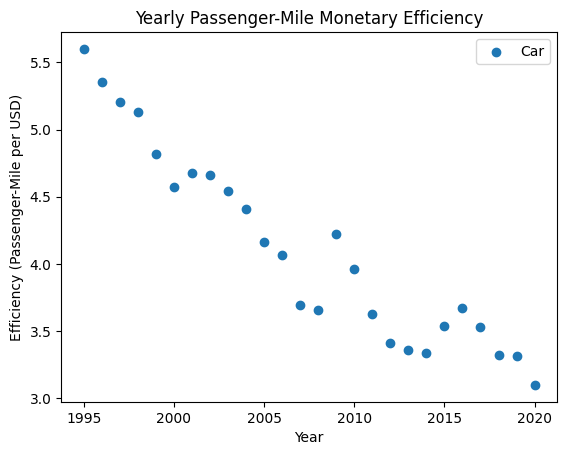

In [152]:
# Calculate automobile transportation financial efficiency by dividing passenger-miles by government expendures + personal automobile expendetures.
full_df[('Automobile Profile', 'Car Efficiency')] = full_df[('Automobile Profile', 'Passenger-Miles (Millions)')] / (full_df[('Highway Profile', 'Gov Expenditures (Millions USD)')] + full_df[('Automobile Profile', 'Personal Auto Expenditures (Millions USD)')])

# Use matplotlib.pyplot to plot car financial efficiency per year.
plt.scatter(full_df.index, full_df['Automobile Profile', 'Car Efficiency'], label='Car')
plt.title('Yearly Passenger-Mile Monetary Efficiency')
plt.xlabel('Year')
plt.ylabel('Efficiency (Passenger-Mile per USD)')
plt.legend()
plt.show()

As may be seen from the graph, the financial efficiency of automobile-based transportation is sharply decreasing over time. This is because the more roads are built, the higher the annual cost of maintenance, as the government, be it federal, state, or local, still needs to pay for all of the roads which have already been built. As can be seen from this graph, the current development pattern of building more and more roads will quickly become unsustainable as time goes on and passenger-miles per dollar spent sharply decreases.

## Passenger-Miles vs Passenger Expenses
We will now compare passenger-miles against passenger expenses for both automobile transportation and public transit. (In this case, 'passenger' means both passenger or driver in automobile contexts.) In other words, does it cost more to drive or take transit?

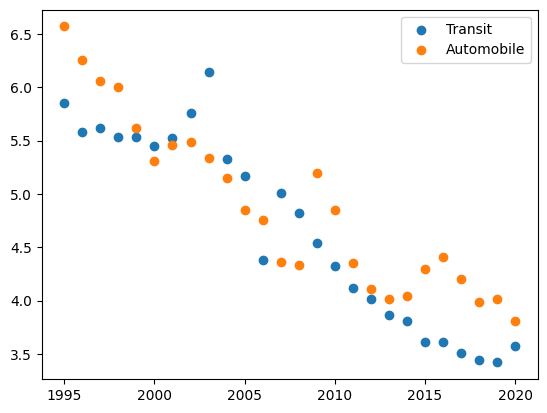

In [153]:
# Plot passenger-miles against passenger fares for transit.
plt.scatter(
    full_df.index, 
    full_df['Transit Profile', 'Passenger-Miles (Millions)'] / full_df['Transit Profile', 'Passenger Fares (Millions USD)'],
    label='Transit'
)

# Plot passenger-miles against passenger expenses for driving.
plt.scatter(
    full_df.index, 
    full_df['Automobile Profile', 'Passenger-Miles (Millions)'] / full_df['Automobile Profile', 'Personal Auto Expenditures (Millions USD)'],
    label='Automobile'
)

plt.legend()
plt.show()

Here we see that difference in the per-mile cost for taking public transportation vs driving stays relatively small throughout recent years, only fluctuating a few dollars or so in the course of each year. Notably, both forms of transportation seem to be getting relatively cheaper throughout the years, indicating less of a financial burden on citizens. However, this trend still poses a problem. To elucidate it, let us explicitly lay out a few things:
* The difference in the per-mile cost of taking transit vs driving is small enough that most people would not notice it in their daily lives.
* The above point means that people feel no financial incentive to take transit once they already own a car.
* Driving is still more expensive than taking transit because, unlike buying a car, you do not need to buy a public transit vehicle.

In summary, despite billions of dollars in <a href='https://www.iea.org/reports/fossil-fuels-consumption-subsidies-2022'>oil subsidies</a>, transit which has been made to rely on passenger fares to pay for operating costs in the face of government <a href='https://blog.ucsusa.org/kshen/wheres-my-train-chronic-disinvestment-in-transit-leaves-us-all-stuck/'>disinvestment</a>, still manages to be competetive in cost to driving. This is not enough: as we seek to reduce carbon emissions, we need financial incentives which will cause people to reconsider driving instead of taking transit. 

## Fatalities Analysis and Visualization
We now turn to analysis of fatalities in both automobile based transportation and public transit based transporation. We shall compare the fatalities per passenger-mile for each mode of transporation over the years to see which is safer.

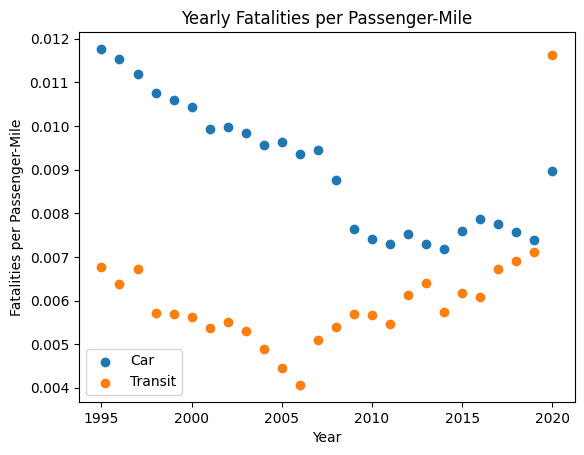

In [154]:
# Calculate automobile transportation fatalities per passenger-mile.
full_df[('Automobile Profile', 'Fatality Rate')] = (full_df['Automobile Profile', 'Fatalities']) / full_df[('Automobile Profile', 'Passenger-Miles (Millions)')]

# Calculate public transit fatalities per passenger-mile.
full_df[('Transit Profile', 'Fatality Rate')] = full_df[('Transit Profile', 'Fatalities')] / full_df[('Transit Profile', 'Passenger-Miles (Millions)')]


# Use matplotlib.pyplot to plot car fatality rate per passenger-mile for
# car transporation and transit.
plt.scatter(full_df.index, full_df['Automobile Profile', 'Fatality Rate'], label='Car')
plt.scatter(full_df.index, full_df['Transit Profile', 'Fatality Rate'], label='Transit')
plt.title('Yearly Fatalities per Passenger-Mile')
plt.xlabel('Year')
plt.ylabel('Fatalities per Passenger-Mile')
plt.legend()
plt.show()

This graph tells us that public transit consistently has lower fatalities per passenger mile than automobile-based transportation despite systemic disinvestment in public transportation infrastructure since the middle of the last century and massive investment in automobile safety mechanisms such as air bags, crumple zones, and specialized seat design. This is because public transit is an inherently safer form of travel due to it having less points of failure. The large outlier in this trend in the year 2020 is likely due to the Coronavirus pandemic causing enclosed, crowded spaces to become <a href='https://www.its.ucla.edu/news/for-the-press/transportation-coronavirus-covid19/'>more dangerous</a>.

## Nonmotorist Fatalities in Relation to Total Automobile Fatalities
We will now visualize and discuss the group which is most often overlooked when talking about automobile transportation in order to raise awareness of their plight: nonmotorists. Please remember as you interpret this analysis and visualization that all of the fatalities in this section were the result of car crashes.

Nonmotorist Fatality Ratio: 0.21237556749832476


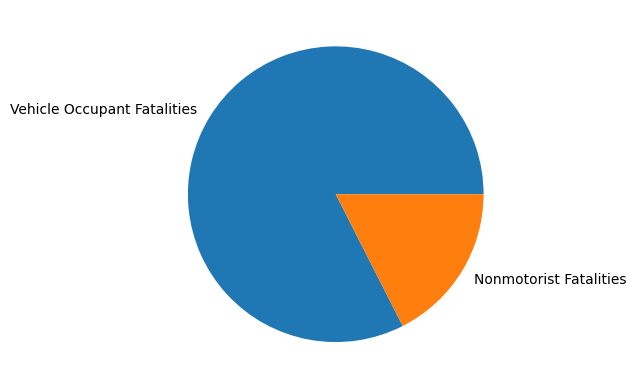

In [155]:
# Total car occupant fatalities from 1995 to 2020.
vehicle_occupant_fatalities = full_df[('NHTSA Stats',
                                       'Vehicle Occupant Fatalities')].sum()

# Total nonmotorist fatalities from 1995 to 2020.
nonmotorist_fatalities = full_df[('NHTSA Stats',
                                  'Nonmotorist Fatalities')].sum()

# Plot a pie chart visualizing the ratio between motorist and nonmororist
# fatalities resulting from car crashes.
plt.pie(x=[vehicle_occupant_fatalities,
         nonmotorist_fatalities],
         labels=['Vehicle Occupant Fatalities',
                 'Nonmotorist Fatalities']);

# Print the explicit ratio.
print('Nonmotorist Fatality Ratio:', nonmotorist_fatalities/vehicle_occupant_fatalities)

We note here that more than 20% of the fatalities resulting from car crashes between 1995 and 2020 are nonmotorists, the vast majority of whom are either pedestrians or cyclists. This is one of the most overlooked things when discussing automobile transportation: no other modern means of transporation results in this magnitude of death for those who are not using it. Cars alone actively endanger the lives of people who are not using them, putting that burden on the driver. Automobile dependency is inequitable and unethical in its endangerment of even those who do not benefit from it or choose not to participate in it.

### Nonmotorist Fatalities Over Time
Lastly, we'll plot the percentage of automobile-related fatalities composed of nonmotorists over time .

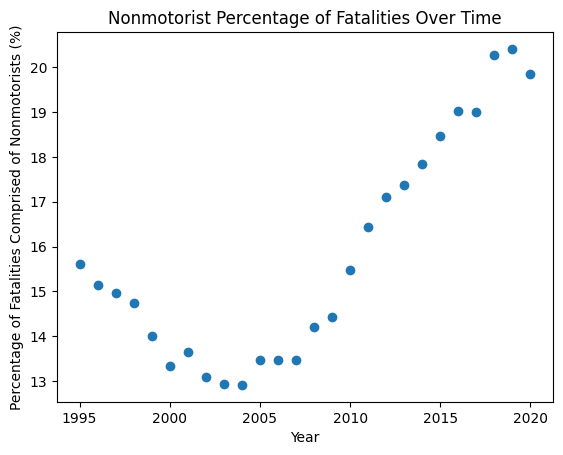

In [156]:
# Plot the ratio of automobile-related deaths which are nonmotorists to the
# total automobile-related deaths in a year and multiply the result by 100
# to get percentages.
plt.scatter(full_df.index, 100 * full_df['NHTSA Stats', 'Nonmotorist Fatalities'] / full_df['Automobile Profile', 'Fatalities'])
plt.title('Nonmotorist Percentage of Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Fatalities Comprised of Nonmotorists (%)')
plt.show()

# Step 4: Modeling and Further Analysis with Machine Learning and Statistics
In this section, we will use machine learning to attempt to fit models to the data and draw insights. Statistical hypothesis testing will be employed to determine whether variables are correlated.
First, let's use linear regression to see if automobile passenger-miles relates to automobile-related fatalities as one would expect it to.

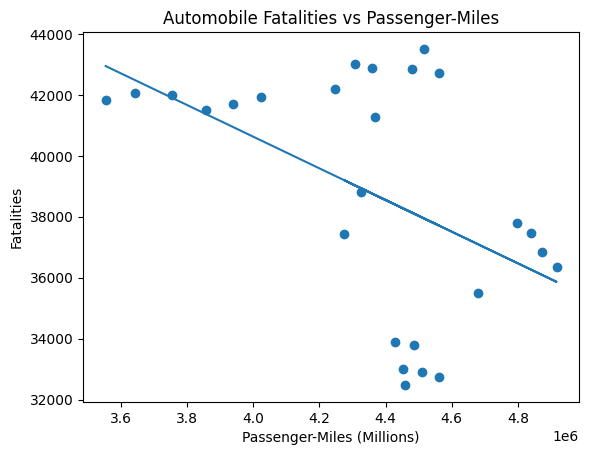

In [157]:
# Get automobile passenger-miles and automobile-related fatalities for each year.
auto_pass_miles = full_df['Automobile Profile', 'Passenger-Miles (Millions)'].to_numpy().reshape(-1, 1)
auto_fatalities = full_df['Automobile Profile', 'Fatalities']

# We will be using a linear regression model to fit the relationship between 
# automobile passenger-miles and automobile-related fatalities.
model = lin_mod.LinearRegression()
model = model.fit(auto_pass_miles, auto_fatalities)

# Use the model to predict the automobile fatalities arising from the automobile
# passenger-miles.
preds = model.predict(auto_pass_miles)

# Plot the automobile-related fatalities and automobile passenger-miles for
# each year along with the linear regression model relating them.
plt.scatter(auto_pass_miles, auto_fatalities)
plt.plot(auto_pass_miles, preds)
plt.title('Automobile Fatalities vs Passenger-Miles')
plt.xlabel('Passenger-Miles (Millions)')
plt.ylabel('Fatalities')
plt.show()

The datapoints appear in a very strange pattern, and our linear model doesn't fit them very well at all. This implies that there are likely additional factors which influence automobile-related fatalities and automobile passenger-miles in each year. We will next attempt to see whether automobile fatalities are affected by what year it is by using data visualization.

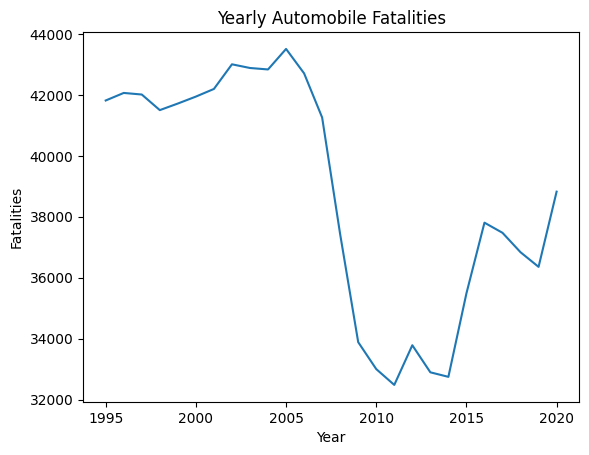

In [158]:
# Make a line plot of automobile-related fatalities over time.
plt.plot(full_df.index, full_df['Automobile Profile', 'Fatalities'])
plt.title('Yearly Automobile Fatalities')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

As may be seen by this plot, there is clearly a relation between year and automobile fatalities. It looks like automobile fatalities increased slightly between 1995 and ~2005, dropped sharply from ~2005 to 2010, and began sharply rising around 2015.

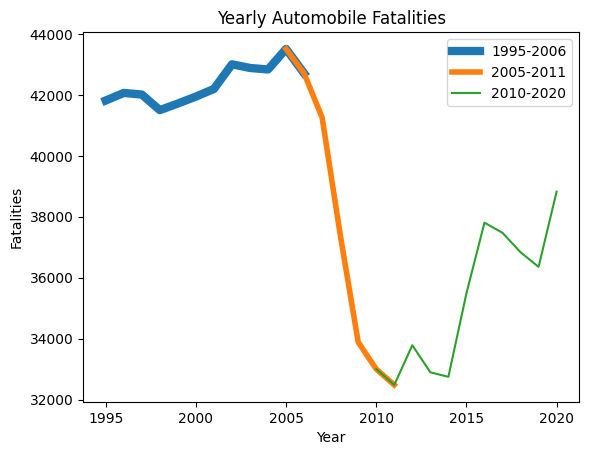

In [159]:
# Let us illustrate these trends more clearly by lebling the separate year
# ranges with different colours in the graph.
years = full_df.index.tolist()
fatalities = full_df['Automobile Profile', 'Fatalities'].tolist()

# Plot using different linee widths and colors.
plt.plot(years[:12], fatalities[:12], linewidth=6, label='1995-2006')
plt.plot(years[10:17], fatalities[10:17], linewidth=4, label='2005-2011')
plt.plot(years[15:], fatalities[15:], label='2010-2020')
plt.title('Yearly Automobile Fatalities')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

Going back to our original plot, we can see that the time intervals apply here too.

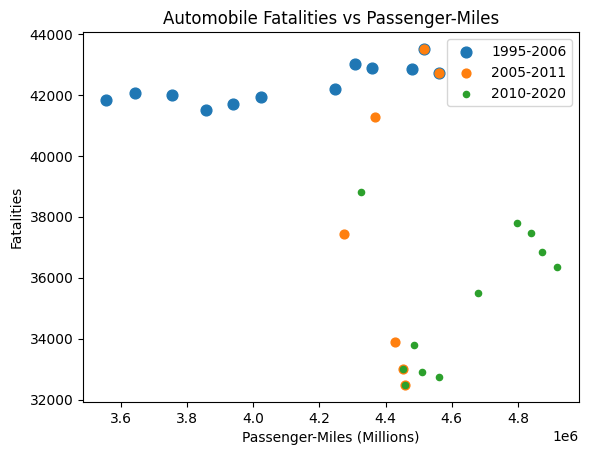

In [160]:
# Scatterplot our original automobile passenger-miles vs automobile fatalities
# data for each time interval, labeling the corresponding dots and separating
# them with colours.
plt.scatter(auto_pass_miles[:12], auto_fatalities[:12], s=60, label='1995-2006')
plt.scatter(auto_pass_miles[10:17], auto_fatalities[10:17], s=40, label='2005-2011')
plt.scatter(auto_pass_miles[15:], auto_fatalities[15:], s=20, label='2010-2020')

# Plot our original data once more.
plt.title('Automobile Fatalities vs Passenger-Miles')
plt.xlabel('Passenger-Miles (Millions)')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

If there are 3 distinct time intervals into which our automobile fatalities vs automotible passenger-miles, we shall fit 3 separate linear regression models correpoding to each of these intervals:

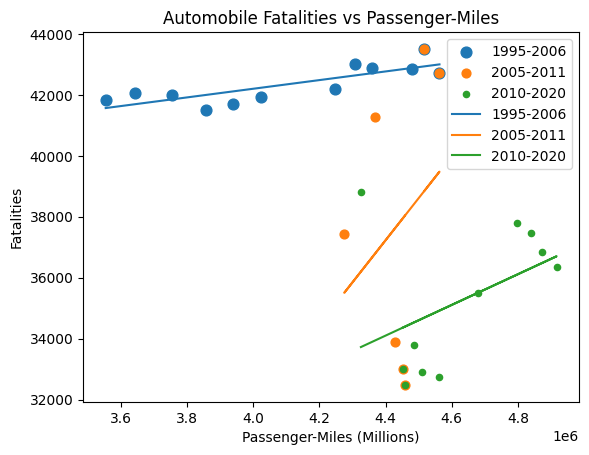

In [161]:
model1 = lin_mod.LinearRegression()
model2 = lin_mod.LinearRegression()
model3 = lin_mod.LinearRegression()

model1.fit(auto_pass_miles[:12], auto_fatalities[:12])
model2.fit(auto_pass_miles[10:17], auto_fatalities[10:17])
model3.fit(auto_pass_miles[15:], auto_fatalities[15:])

preds1 = model1.predict(auto_pass_miles[:12])
preds2 = model2.predict(auto_pass_miles[10:17])
preds3 = model3.predict(auto_pass_miles[15:])

plt.scatter(auto_pass_miles[:12], auto_fatalities[:12], s=60, label='1995-2006')
plt.scatter(auto_pass_miles[10:17], auto_fatalities[10:17], s=40, label='2005-2011')
plt.scatter(auto_pass_miles[15:], auto_fatalities[15:], s=20, label='2010-2020')
plt.plot(auto_pass_miles[:12], preds1, label='1995-2006')
plt.plot(auto_pass_miles[10:17], preds2, label='2005-2011')
plt.plot(auto_pass_miles[15:], preds3, label='2010-2020')
plt.title('Automobile Fatalities vs Passenger-Miles')
plt.xlabel('Passenger-Miles (Millions)')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

Fitting separate linear regression models for each year interval has clearly made a big improvement in their accuracy, particularly for the years 1995-2006. However, the models for the years 2005-2011 and 2010-2020 still don't seem to fit very well. This is to be expected for the year interval 2005-2011; looking at the scatter plot, the fatalities for this interval seem to vary wildly, having little correlation with passenger-miles. Considering this, it seems highly unlikely any sort of regression model would be able to accurately model it. On the other hand, the data for 2010-2020 appear to have an outlier; this may be skewing the linear model, thus explaining the inaccuracy. To solve this, we can try a huber regressor, which is a linear regression model which optimizes with a combination of L2 and L1 loss to increase robustness against outliers. Specifically, it uses L2 loss on most training samples and uses L1, which is more resistant to outliers, on samples which it classifies as such. While it seems likely futile, we attempt to fit a huber regressor for 2005-2011 as well.

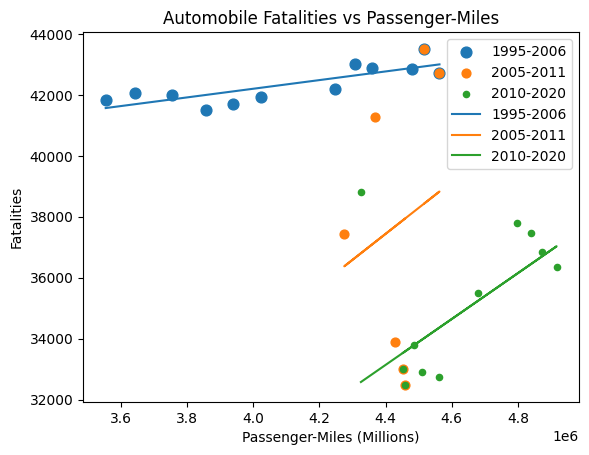

In [162]:
model2 = lin_mod.HuberRegressor()
model3 = lin_mod.HuberRegressor()

model2.fit(auto_pass_miles[10:17], auto_fatalities[10:17])
model3.fit(auto_pass_miles[15:], auto_fatalities[15:])

preds2 = model2.predict(auto_pass_miles[10:17])
preds3 = model3.predict(auto_pass_miles[15:])

plt.scatter(auto_pass_miles[:12], auto_fatalities[:12], s=60, label='1995-2006')
plt.scatter(auto_pass_miles[10:17], auto_fatalities[10:17], s=40, label='2005-2011')
plt.scatter(auto_pass_miles[15:], auto_fatalities[15:], s=20, label='2010-2020')
plt.plot(auto_pass_miles[:12], preds1, label='1995-2006')
plt.plot(auto_pass_miles[10:17], preds2, label='2005-2011')
plt.plot(auto_pass_miles[15:], preds3, label='2010-2020')
plt.title('Automobile Fatalities vs Passenger-Miles')
plt.xlabel('Passenger-Miles (Millions)')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

As can be seen above, our huber regressor worked wonders! We now have models which accurately predict fatalities as a function of passenger-miles for both 1995-2006 and 2010-2020. Unfortunately we still haven't fit 2005-2011, but this is to be expected given how wildly the data in that interval varies. It seems that in both 1995-2006 and 2010-2020, fatalities can be seen to be increasing as passenger-miles increase. Furthermore, since 2010-2020 is our most recent data, it seems reasonable to assume this trend will continue into the future. This is further reinforced by the fact that the model for 1995-2006 also shows a positive correlation, thus implying that 2005-2011 had abnormal behavior, possibly due to abnormal outside influences.

# Step 5: Data Interpretation and Insight

Our analysis has given us much insight into how public transit and automobile-based transit in the US compare over time in regards to finances and fatalities. It tells us what advocates have been saying for years: reducing car <a href='https://en.wikipedia.org/wiki/Modal_share'>modal share</a> in the US would save lives and help save money, both in the wallets of individuals and the coffers of governments. It tells us that maintaining car infrastructure is financially unsustainable, and that public transit is a safer ways to travel. Finally, our linear regression analysis informs us that traffic fatalities increase as miles driven increase, even in the face of safety improvements which occur over time.

We hope that this project has also given readers an introduction in both the tools and methodologies of data science and the power it has to raise awareness of important issues which would otherwise remain relegated to spreadsheets. Gathering data is always the first step; then, it must be rearranged and cleaned to convert it to a tidy format which is easy to work with and analyze and to deal with missing values in a way which will minimize the disruption of the trends which may be found in the data. Once the data is ready to be worked with, it is useful to visualize it as analysts may notice trends which can be further researched. After this, once trends in the data are identified, machine learning algorithms may be employed to model the data and draw further insights and/or predict future outcomes. Finally, after analysis has concluded, the data may be interpreted and hopefully conclusions about its contents may be leveraged to inform important decisions.

# Further Information for Interested Persons
There are many advocates and advocacy groups, from local international, fighting to spread awareness about automobile dependency and push for solutions to be implemented. Here a few are listed, as well as some sources from which interested readers may learn more information about automobile dependency:
* <a href='https://en.wikipedia.org/wiki/Car_dependency'>Wikipedia</a> is always a good starting point.
* <a href='https://www.planetizen.com/definition/automobile-dependency'>Planetizen</a> and <a href='https://www.vtpi.org/tdm/tdm100.htm'>Victoria Transport Poliy Institute</a> both have very good articles defining and detailing some common aspects of car dependency.
* <a href='https://www.youtube.com/@NotJustBikes/featured'>Not Just Bikes</a>, courtesy of Jason Slaughter, became most popular 'urban planning' channel on YouTube as of 2022. Not Just Bikes explores Dutch urban design and transportation engineering with a focus on comparing it to American and Canadian development. Car dependency is a central topic throughout these videos.
* <a href='strongtowns.org'>Strong Towns</a> is an American advocacy organisation focused on local governance, city finances, and urban development. Its founder, Charles Marohn, served as a professional traffic engineer, and advocates for reduced car dependency in tandem with zoning reform and road design reform in the US.

For those looking for more information about the python libraries and features we used, here we link their documentation:
* <a href='https://pandas.pydata.org/docs/'>Pandas</a>
* <a href='https://requests.readthedocs.io/en/latest/'>Requests</a>
* <a href='https://beautiful-soup-4.readthedocs.io/en/latest/'>BeautifulSoup</a>
* <a href='https://matplotlib.org/stable/index.html'>Matplotlib</a>
* <a href='https://docs.python.org/3/library/warnings.html'>Warnings</a>

Finally, here are some resources from which readers may learn more about data science and hypothesis testing:
* <a href='https://en.wikipedia.org/wiki/Data_science'>Data Science</a>
* <a href='https://www.britannica.com/science/statistics/Hypothesis-testing'>Hypothesis Testing</a>